In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

print(train.shape, test.shape)

(13645, 22) (8745, 20)


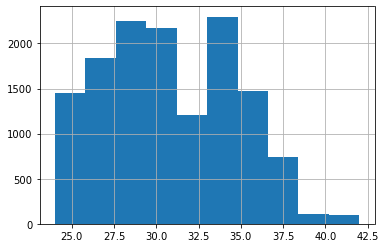

In [13]:
train['Age'].hist()

In [14]:
train['Age'].describe()

count    13645.000000
mean        30.691242
std          3.881378
min         24.000000
25%         28.000000
50%         31.000000
75%         34.000000
max         42.000000
Name: Age, dtype: float64

In [22]:
train[(train['Age']>40) & (train['Age']<=45)]['Age']

239      42
275      42
349      41
424      41
517      42
         ..
13000    41
13115    42
13427    42
13516    42
13595    42
Name: Age, Length: 103, dtype: int64

In [3]:
print(train.shape)

train1 = train[[ 'LanguageOfCommunication', 'Age', 'Gender',
       'JobProfileIDApplyingFor', 'HighestDegree', 'DegreeBranch',
       'GraduatingInstitute', 'LatestDegreeCGPA', 'YearsOfExperince',
       'CurrentCTC', 'MartialStatus',
       'EmpScore', 'CurrentDesignation', 'CurrentCompanyType',
       'DepartmentInCompany', 'TotalLeavesTaken']].copy()
print(train1.shape)

train1['GraduatingInstitute'] = train['GraduatingInstitute'].map({'Tier 1':3,'Tier 2':2, 'Tier 3':1})
train1['ExpectedHike'] = (train['ExpectedCTC']-train['CurrentCTC'])/train['CurrentCTC']*100
print(train1.shape)
train1.head()

(13645, 22)
(13645, 16)
(13645, 17)


,LanguageOfCommunication,Age,Gender,JobProfileIDApplyingFor,HighestDegree,DegreeBranch,GraduatingInstitute,LatestDegreeCGPA,YearsOfExperince,CurrentCTC,MartialStatus,EmpScore,CurrentDesignation,CurrentCompanyType,DepartmentInCompany,TotalLeavesTaken,ExpectedHike
0,English,35,Male,JR85289,B.Tech,Electrical,3,7,12,21,Married,5,SSE,Enterprise,Design,20,23.809524
1,English,26,Male,JR87525,B.Tech,Artificial Intelligence,1,7,3,15,Married,5,BA,MidSized,Engineering,6,26.666667
2,English,36,Female,JR87525,PhD,Computer Science,3,6,6,15,Single,5,SDE,MidSized,Engineering,19,60.000000
3,English,29,Female,JR87525,BCA,Information Technology,2,5,6,16,Married,5,SDE,Startup,Product,16,50.000000
4,English,25,Male,JR70175,Dual M.Tech,Computer Science,1,8,2,24,Married,5,SDE,Enterprise,Engineering,10,33.333333


In [4]:
target_col = train['BiasInfluentialFactor'].fillna('Unknown')
target_col.head()

0    YearsOfExperince
1             Unknown
2              Gender
3              Gender
4        DegreeBranch
Name: BiasInfluentialFactor, dtype: object

In [5]:
X = pd.get_dummies(train1, drop_first=True).values
y = target_col.copy().values
print(X.shape,y.shape)

(13645, 46) (13645,)


In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler  = MinMaxScaler((0,1))
X_scaled = scaler.fit_transform(X)
print(X_scaled.shape)
X_scaled[0]

(13645, 46)


array([0.61111111, 1.        , 0.5       , 1.        , 0.625     ,
       1.        , 1.        , 0.06832298, 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        ])

In [7]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
y_en = ohe.fit_transform(y.reshape(-1,1)).toarray()

In [8]:
ohe.categories_

[array(['CurrentCompanyType', 'DegreeBranch', 'EmpScore', 'Ethinicity',
        'Gender', 'HighestDegree', 'LatestDegreeCGPA', 'MartialStatus',
        'Unknown', 'YearsOfExperince'], dtype=object)]

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_scaled,y_en, test_size=0.20, 
                                                  stratify=y_en, shuffle=True, random_state=123)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(10916, 46) (2729, 46) (10916, 10) (2729, 10)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

ImportError: Traceback (most recent call last):
  File "C:\Users\anshusah\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\pywrap_tensorflow.py", line 18, in swig_import_helper
    fp, pathname, description = imp.find_module('_pywrap_tensorflow', [dirname(__file__)])
  File "C:\Users\anshusah\Anaconda3\lib\imp.py", line 296, in find_module
    raise ImportError(_ERR_MSG.format(name), name=name)
ImportError: No module named '_pywrap_tensorflow'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\anshusah\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\__init__.py", line 66, in <module>
    from tensorflow.python import pywrap_tensorflow
  File "C:\Users\anshusah\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\pywrap_tensorflow.py", line 28, in <module>
    _pywrap_tensorflow = swig_import_helper()
  File "C:\Users\anshusah\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\pywrap_tensorflow.py", line 20, in swig_import_helper
    import _pywrap_tensorflow
ModuleNotFoundError: No module named '_pywrap_tensorflow'


Failed to load the native TensorFlow runtime.

See https://github.com/tensorflow/tensorflow/blob/master/tensorflow/g3doc/get_started/os_setup.md#import_error

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.